<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## *AIB / SECTION 4 / SPRINT 3 / NOTE 3*

---

# N433. AutoEncoder

## AutoEncoder

<font color="ff6f61">**AutoEncoder(오토인코더)**</font>는 입력 데이터를 저차원의 벡터로 압축한 뒤 원래 크기의 데이터로 복원하는 신경망입니다.<br/>
아래는 기본적인 AutoEncoder의 구조를 나타낸 이미지입니다.

<img src='https://i.imgur.com/9jbTB2O.png' height="400"/>

AutoEncoder의 기본적인 구조는 위 그림처럼 모래시계(?) 형태를 띠고 있습니다.<br/>
위에 Code 라고 표시된 가장 저차원의 벡터는 **Latent(잠재) 벡터**라고도 하는데요.<br/>
AutoEncoder 에서 중요한 의미를 갖는 Latent 벡터란 무엇일까요?.

<font color="ff6f61">**Latent(잠재) 벡터**</font>란 원본 데이터보다 차원이 작으면서도, 원본 데이터의 특징을 잘 보존하고 있는 벡터를 말하는데요.<br/>
AutoEncoder는 궁극적으로 이 Latent 벡터를 잘 얻기 위한 방법이라고 할 수 있겠습니다.

> ❗️***더 자세히 알아보고 싶다면 매니폴드 학습(Manifold Learning)에 대해 학습해봅시다.***

원본 데이터를 더 낮은 차원으로 압축했다가 복원하는 과정에서 원본 데이터의 특징을 최대한 보존하는 Latent 벡터를 학습할 수 있게 됩니다.<br/>
그렇다면 이렇게 얻어진 Latent 벡터는 어디에 활용할 수 있을까요?<br/>
즉, **AutoEncoder** 를 어디에 활용할 수 있을까요?

### AutoEncoder 활용하기

AutoEncoder의 대표적인 쓰임새는 다음과 같습니다.

- **차원 축소(Dimensionality Reduction)와 데이터 압축**
- **데이터 노이즈 제거(Denoising)**
- **이상치 탐지(Anomaly Detection)**

기본적인 형태의 AutoEncoder 부터 예제를 통해 알아보도록 하겠습니다.

### Example 1 : 기본적인 AutoEncoder

Example 1, 2 에서는 Fashion MNIST 데이터셋을 다시 사용해보겠습니다.

1. **필요한 라이브러리를 Import 하여줍니다.**

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2. **데이터셋을 불러온 뒤 정규화 하여줍니다.**

    본 예제에서는 레이블은 사용하지 않기 때문에 `_` 로 처리하여줍니다.

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


3. **AutoEncoder 모델을 구축합니다.**

In [ ]:
# 잠재 벡터(Latent vector)의 차원 수를 정해줍니다.
LATENT_DIM = 64 

In [ ]:
class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(784, activation='sigmoid'),
            layers.Reshape((28, 28))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
model = Autoencoder(LATENT_DIM)

4. **모델을 `compile` 해준 후에 학습합니다.**

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(x_train, x_train,
          epochs=10,
          shuffle=True,
          validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0237 - val_loss: 0.0132
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0116 - val_loss: 0.0107
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0102 - val_loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0096 - val_loss: 0.0096
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0092 - val_loss: 0.0093
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0089 - val_loss: 0.0091
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.008

5. **학습된 모델을 사용하여 시험(`test`) 이미지를 인코딩 후 디코딩하여줍니다.**

    이후 특정 10개의 이미지를 시각화하여 잘 복원되었는지 확인해봅니다.

In [ ]:
encoded_imgs = model.encoder(x_test).numpy()
decoded_imgs = model.decoder(encoded_imgs).numpy()

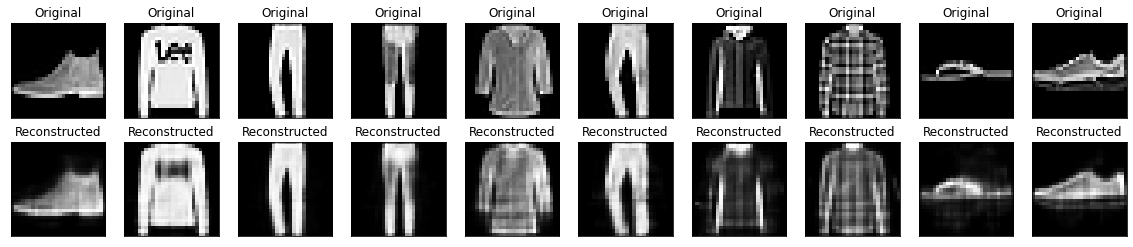

In [ ]:
n = 10

plt.figure(figsize=(20, 4))

for i in range(n):
    # 원본 이미지를 출력합니다.
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # AutoEncoder에 의해서 복원된 이미지를 출력합니다.
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

### Examle 2 : DAE(Denoising AutoEncoder)

1. **데이터셋을 불러온 뒤 정규화 하여줍니다.**

    이번에는 Encoder/Decoder 에서 완전 연결 신경망(**`Dense`**)이 아닌 Convolution 층(**`Conv2D`**)을 사용해보겠습니다.<br/>
이러한 AutoEncoder 를 **Convolutional AutoEncoder** 라고도 부릅니다.<br/>
데이터셋을 Convolutional AutoEncoder 에 적용하기 위해서는 데이터에 임의의 채널을 더하는 과정이 필요합니다.

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [ ]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [ ]:
print(x_train.shape)

(60000, 28, 28, 1)


2. **Random Noise 추가**

    모델이 Noise 있는 이미지 데이터를 입력받을 수 있도록 임의의 Noise 를 추가합니다.<br/>
    Noise를 추가한 이미지를 시각화 해봅니다.

In [ ]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

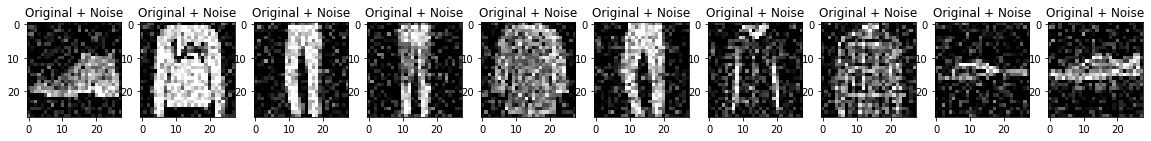

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("Original + Noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

3. **Denoising AutoEncoder 모델을 구축합니다.**

In [ ]:
class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(28, 28, 1)), 
            layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
            layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])
        
        self.decoder = tf.keras.Sequential([
            layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

model = Denoise()

In [ ]:
model.compile(optimizer='adam', loss='mse')

입력 데이터는 Noise 있는 데이터, Target 데이터는 원본 이미지가 되어야합니다.

In [ ]:
model.fit(x_train_noisy, x_train,
          epochs=10,
          shuffle=True,
          validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 20s 7ms/step - loss: 0.0176 - val_loss: 0.0103
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0093 - val_loss: 0.0087
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0083 - val_loss: 0.0081
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0079 - val_loss: 0.0078
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

In [ ]:
model.encoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.decoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTra  (None, 14, 14, 8)        584       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


5. **학습된 모델을 사용하여 시험(`test`) 이미지를 인코딩 후 디코딩하여줍니다.**

    이후 특정 10개의 이미지를 시각화하여 잘 복원되었는지 확인해봅니다.

In [ ]:
encoded_imgs = model.encoder(x_test).numpy()
decoded_imgs = model.decoder(encoded_imgs).numpy()

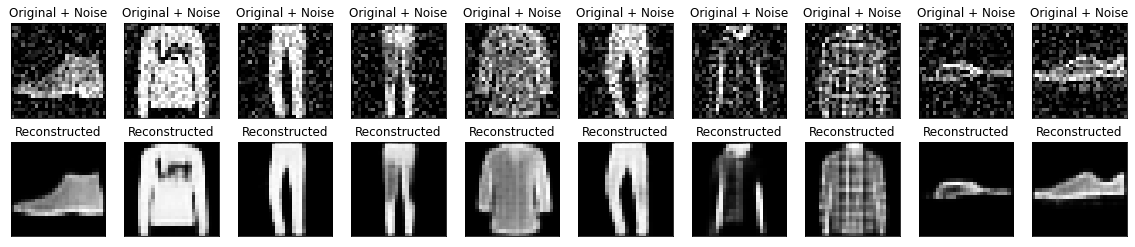

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # Noise가 추가된 원본 이미지를 출력합니다.
    ax = plt.subplot(2, n, i + 1)
    plt.title("Original + Noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # AutoEncoder에 의해서 복원된 이미지를 출력합니다.
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("Reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

### Example 3 : 이상치 탐지(Anomaly Detection)

비정상 데이터를 탐지하기 위한 **<font color="ff6f61">이상치 탐지(Anomaly Detection)</font>**에도 AutoEncoder 를 사용할 수 있습니다.<br/>
AutoEncoder는 특정 데이터의 중요 특징, 즉 잠재 벡터를 바탕으로<br/>
다시 원본 데이터로 **복원할 때에 발생하는 오류, 즉 복원 오류(Reconstruction Error)**를 최소화 하도록 훈련됩니다.

정상 데이터로만 훈련한 뒤에 비정상 데이터셋을 복원한다면 복원 오류가 커질 것입니다.<br/>
복원 오류가 특정한 임계값을 초과하는 경우 해당 데이터를 비정상으로 판단할 수 있습니다.

이번 예제에서는 심전도를 측정한 데이터셋인 **ECG 5000**을 사용할 것입니다.<br/>
해당 데이터는 140개의 Feature를 가지고 있으며 크기는 5,000개 입니다.<br/>
141번째 Column은 비정상 데이터(**`0`**)와 정상 데이터(**`1`**)를 구분하는 역할을 합니다.<br/>
정상 데이터로 훈련 후에 비정상 데이터를 제대로 구분해낼 수 있는지 알아보도록 하겠습니다.

1. **데이터셋 다운로드 후 전처리 및 분리(`split`)합니다.**

    Feature(**`data`**)와 Label(**`label`**)을 구분한 후에 분리합니다.

In [ ]:
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
df = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
df_value=df.values
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,-0.591670,...,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,-0.174563,...,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,-0.556386,...,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.176473,-0.156932,-0.149172,-0.181510,-0.180074,-0.246151,-0.274260,-0.140960,-0.277449,-0.382549,-0.311937,-0.360093,-0.405968,-0.571433,-0.524106,-0.537886,-0.606778,-0.661446,-0.683375,-0.746683,-0.635662,-0.625231,-0.540094,-0.674995,...,1.772155,2.000769,1.925003,1.898426,1.720953,1.501711,1.422492,1.023225,0.776341,0.504426,0.056382,-0.233161,-0.406388,-0.327528,-0.460868,-0.402536,-0.345752,-0.354206,-0.439959,-0.425326,-0.439789,-0.451835,-0.395926,-0.448762,-0.391789,-0.376307,-0.461069,-0.253524,0.213006,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,-0.298107,-0.428928,-0.491351,-0.361304,-0.339296,-0.324952,-0.290113,-0.363051,-0.525684,-0.597423,-0.575523,-0.567503,-0.504555,-0.618406,-0.682814,-0.743849,-0.815588,-0.826902,-0.782374,-0.929462,-0.999672,-1.060969,-1.007877,-1.028735,-1.122629,-1.028650,-1.046515,-1.063372,-1.122423,-0.983242,...,1.155363,1.336254,1.627534,1.717594,1.696487,1.741686,1.674078,1.546928,1.331738,1.110168,0.922210,0.521777,0.154852,-0.123861,-0.202998,-0.247956,-0.219122,-0.214695,-0.319215,-0.198597,-0.151618,-0.129593,-0.074939,-0.

In [ ]:
label = df_value[:, -1]
data = df_value[:, 0:-1]

train_data, test_data, train_label, test_label = train_test_split(data, label, test_size=0.2, random_state=42)

2. **데이터셋을 정규화합니다.**

    MinMaxScaling 방식을 적용합니다.

In [ ]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

3. **정상 데이터셋과 비정상 데이터셋을 분리합니다.**

    모델 학습 시에는 데이터셋에서 **`1`**로 레이블이 지정된 정상 데이터만 사용합니다.

In [ ]:
train_label = train_label.astype(bool)
test_label = test_label.astype(bool)

normal_train_data = train_data[train_label]
normal_test_data = test_data[test_label]

anomalous_train_data = train_data[~train_label]
anomalous_test_data = test_data[~test_label]

4. **정상 데이터셋과 비정상 데이터셋 중 특정 데이터를 각각 시각화 해봅시다.**

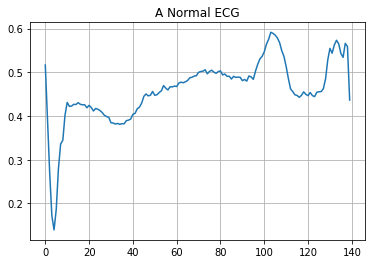

In [ ]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

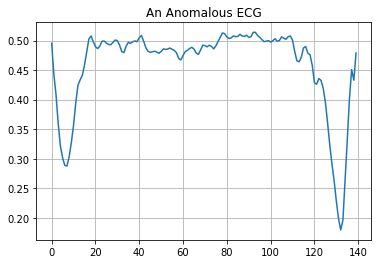

In [ ]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

5. **AutoEncoder 모델을 구축한 후에 학습합니다.**

    손실 함수로는 MAE를 사용하겠습니다.<br/>
    학습 시에는 정상 데이터만 사용하여야 함을 잊지 않도록 합니다.
    

In [ ]:
class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Dense(32, activation="relu"),
            layers.Dense(16, activation="relu"),
            layers.Dense(8, activation="relu")])
        
        self.decoder = tf.keras.Sequential([
            layers.Dense(16, activation="relu"),
            layers.Dense(32, activation="relu"),
            layers.Dense(140, activation="sigmoid")])    # 마지막 층은 원본 데이터의 차원 수와 동일하게 맞추어줍니다.
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

model = AnomalyDetector()

In [ ]:
model.compile(optimizer='adam', loss='mae')

In [ ]:
history = model.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20
5/5 [==============================] - 1s 42ms/step - loss: 0.0578 - val_loss: 0.0528
Epoch 2/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0550 - val_loss: 0.0509
Epoch 3/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0517 - val_loss: 0.0492
Epoch 4/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0480 - val_loss: 0.0474
Epoch 5/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0442 - val_loss: 0.0449
Epoch 6/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0404 - val_loss: 0.0435
Epoch 7/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0370 - val_loss: 0.0418
Epoch 8/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0340 - val_loss: 0.0404
Epoch 9/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0316 - val_loss: 0.0392
Epoch 10/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0297 - val_loss: 0.0383
Epoch 11/20
5/5 [====================

학습 곡선을 시각화합니다.

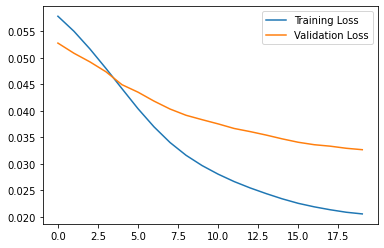

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

6. **학습한 AutoEncoder를 사용하여 복원 오류를 시각화해봅니다.**

먼저 정상 데이터와 AutoEncoder에 의한 복원을 비교한 그래프를 Plot 합니다.

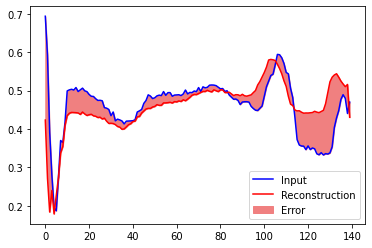

In [ ]:
encoded_imgs = model.encoder(normal_test_data).numpy()
decoded_imgs = model.decoder(encoded_imgs).numpy()

plt.plot(normal_test_data[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(140), decoded_imgs[0], normal_test_data[0], color='lightcoral' )
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

같은 방식으로 비정상 데이터와 AutoEncoder에 의한 복원을 비교한 그래프를 Plot 합니다.

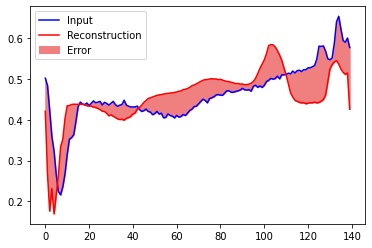

In [ ]:
encoded_imgs = model.encoder(anomalous_test_data).numpy()
decoded_imgs = model.decoder(encoded_imgs).numpy()

plt.plot(anomalous_test_data[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(140), decoded_imgs[0], anomalous_test_data[0], color='lightcoral' )
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

7. **본격적으로 이상치를 판단해봅시다.**

    본 예제에서는 고정된 임계값(=정상 데이터셋에 대한 복원 오류 평균 + 표준편차)을 사용합니다.<br/>
    입력된 데이터에 대한 복원 오류가 고정된 임계값보다 클 경우 이상치로 판단할 것입니다.

먼저 정상 데이터셋에 대한 훈련 오차(**`train_loss`**)를 시각화해보고 임계값을 구합니다.

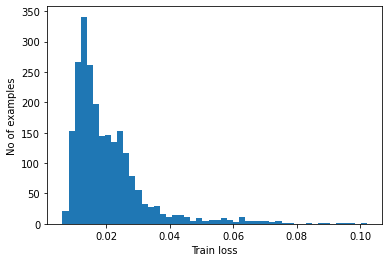

In [ ]:
reconstructions = model.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.03258752


다음으로 비정상 데이터셋에 대한 오차(**`train_loss`**)를 시각화합니다.

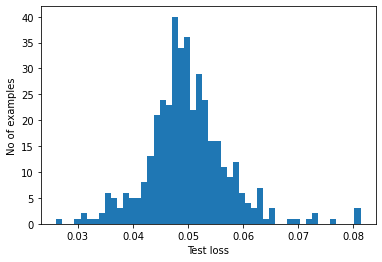

In [ ]:
reconstructions = model.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss, bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

복원 오류가 임계값보다 큰 경우 해당 데이터를 비정상, 즉 이상치로 분류하는 함수를 정의합니다.

In [ ]:
def predict(model, data, threshold):
    reconstructions = model(data)
    loss = tf.keras.losses.mae(reconstructions, data)
    return tf.math.less(loss, threshold)

In [ ]:
def print_stats(predictions, labels):
    print(f"Accuracy = {accuracy_score(labels, predictions)}")
    print(f"Precision = {precision_score(labels, predictions)}")
    print(f"Recall = {recall_score(labels, predictions)}")

In [ ]:
preds = predict(model, test_data, threshold)
print_stats(preds, test_label)

Accuracy = 0.942
Precision = 0.990791896869245
Recall = 0.9103214890016921
